<a href="https://colab.research.google.com/github/rutokevin/DataScience/blob/master/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN & Computer Vision

In [ ]:
# Mounting drive to read data from the drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read data from the drive
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/pest.zip", "r")
zip_ref.extractall()
zip_ref.close()



In [ ]:
# Check the folders
!ls pest

test  train


In [ ]:
train_dir = "pest/train"
test_dir = "pest/test"

In [ ]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['aphids' 'armyworm' 'beetle' 'bollworm' 'grasshopper' 'mites' 'mosquito'
 'sawfly' 'stem_borer']


In [ ]:
# Import tensorflow and use it...
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)
# Import data from directories and turn it into batches
test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical", # type of problem we're working on
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(9, activation="softmax") # binary activation output
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # We use categorical because the classes are more than two otherwise we could use binary
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Found 2700 images belonging to 9 classes.
Found 450 images belonging to 9 classes.
Epoch 1/10
85/85 [==============================] - 10s 104ms/step - loss: 1.7428 - accuracy: 0.4011 - val_loss: 1.0613 - val_accuracy: 0.6822
Epoch 2/10
85/85 [==============================] - 8s 87ms/step - loss: 0.3369 - accuracy: 0.9152 - val_loss: 0.3203 - val_accuracy: 0.9333
Epoch 3/10
85/85 [==============================] - 7s 85ms/step - loss: 0.0201 - accuracy: 0.9970 - val_loss: 0.3305 - val_accuracy: 0.9467
Epoch 4/10
85/85 [==============================] - 9s 108ms/step - loss: 0.0265 - accuracy: 0.9970 - val_loss: 0.3406 - val_accuracy: 0.9444
Epoch 5/10
85/85 [==============================] - 10s 122ms/step - loss: 0.0150 - accuracy: 0.9974 - val_loss: 0.3641 - val_accuracy: 0.9400
Epoch 6/10
85/85 [==============================] - 8s 89ms/step - loss: 0.0127 - accuracy: 0.9981 - val_loss: 0.3525 - val_accuracy: 0.9444
Epoch 7/10
85/85 [==============================] - 9s 105ms/step 

(-0.5, 271.5, 184.5, -0.5)

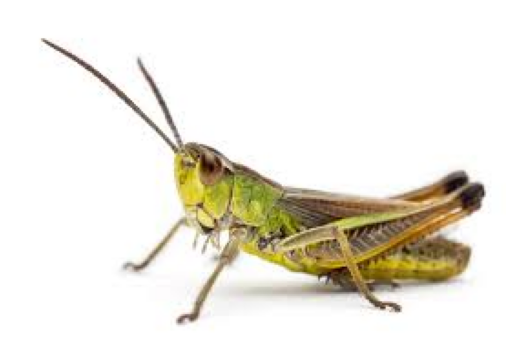

In [ ]:
# View the image to be predicted
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# import os

# pest = os.listdir("/content/pest/test/sawfly")[0]
# pest

pest = mpimg.imread("/content/pest/test/grasshopper/jpg_10.jpg")
plt.imshow(pest)
plt.axis(False)

In [ ]:
# Check the shape of our image
pest.shape


(184, 274, 3)

In [ ]:
# Since our model takes in images of shapes (224, 224, 3), we've got to reshape our custom image to use it with our model.

# To do so, we can import and decode our image using tf.io.read_file (for readining files) and tf.image (for resizing our image and turning it into a tensor).

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
pest_img = load_and_prep_image("/content/pest/test/sawfly/jpg_55.jpg")
pest_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.9411765 , 0.92941177, 0.9019608 ],
        [0.9411765 , 0.92941177, 0.9019608 ],
        [0.9411765 , 0.92941177, 0.9019608 ],
        ...,
        [0.9607843 , 0.9490196 , 0.92156863],
        [0.9607843 , 0.9490196 , 0.92156863],
        [0.9607843 , 0.9490196 , 0.92156863]],

       [[0.9411765 , 0.92941177, 0.9019608 ],
        [0.9411765 , 0.92941177, 0.9019608 ],
        [0.9411765 , 0.92941177, 0.9019608 ],
        ...,
        [0.9607843 , 0.9490196 , 0.92156863],
        [0.9607843 , 0.9490196 , 0.92156863],
        [0.9607843 , 0.9490196 , 0.92156863]],

       [[0.9411765 , 0.92941177, 0.9019608 ],
        [0.9411765 , 0.92941177, 0.9019608 ],
        [0.9411765 , 0.92941177, 0.9019608 ],
        ...,
        [0.9607843 , 0.9490196 , 0.92156863],
        [0.9607843 , 0.9490196 , 0.92156863],
        [0.9607843 , 0.9490196 , 0.92156863]],

       ...,

       [[0.89411765, 0.8901961 , 0.87058824],
        [0.89

Although our image is in the same shape as the images our model has been trained on, we're still missing a dimension.

Remember how our model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, our model was trained on data in the shape of (batch_size, 224, 224, 3).

We can fix this by adding an extra to our custom image tensor using tf.expand_dims.

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {pest_img.shape}")

pest_2 = tf.expand_dims(pest_img, axis=0) # add an extra dimension at axis 0

print(f"Shape after new dimension: {pest_2.shape}")
pest_2

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.9411765 , 0.92941177, 0.9019608 ],
         [0.9411765 , 0.92941177, 0.9019608 ],
         [0.9411765 , 0.92941177, 0.9019608 ],
         ...,
         [0.9607843 , 0.9490196 , 0.92156863],
         [0.9607843 , 0.9490196 , 0.92156863],
         [0.9607843 , 0.9490196 , 0.92156863]],

        [[0.9411765 , 0.92941177, 0.9019608 ],
         [0.9411765 , 0.92941177, 0.9019608 ],
         [0.9411765 , 0.92941177, 0.9019608 ],
         ...,
         [0.9607843 , 0.9490196 , 0.92156863],
         [0.9607843 , 0.9490196 , 0.92156863],
         [0.9607843 , 0.9490196 , 0.92156863]],

        [[0.9411765 , 0.92941177, 0.9019608 ],
         [0.9411765 , 0.92941177, 0.9019608 ],
         [0.9411765 , 0.92941177, 0.9019608 ],
         ...,
         [0.9607843 , 0.9490196 , 0.92156863],
         [0.9607843 , 0.9490196 , 0.92156863],
         [0.9607843 , 0.9490196 , 0.92156863]],

        ...,

        [[0.89411765, 0.8901961 , 

In [ ]:
# Make a prediction on custom image tensor
pred = model_1.predict(pest_2)
pred

1/1 [==============================] - 0s 67ms/step


array([[6.6712164e-06, 6.5974632e-06, 1.3141836e-07, 8.5156171e-06,
        4.0458685e-06, 4.3805053e-06, 3.1858214e-08, 9.9996948e-01,
        6.4397724e-08]], dtype=float32)

In [ ]:
# A prediction function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 28ms/step


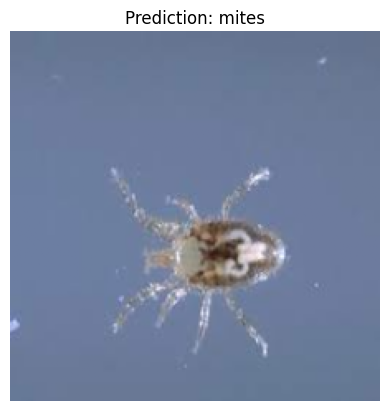

In [ ]:
# Let's make some prediction
pred_and_plot(model_1, "/content/pest/test/mites/jpg_10.jpg", class_names)

In [ ]:
# Save a model
model_1.save("pest_model_1")

In [ ]:
# Load in a model and evaluate it
pest_loaded_model_1 = tf.keras.models.load_model("pest_model_1")
pest_loaded_model_1.evaluate(test_data)

15/15 [==============================] - 1s 60ms/step - loss: 0.3606 - accuracy: 0.9400


[0.3606201112270355, 0.9399999976158142]